# Big-O

## Lesson Overview

A fundamental step in the analysis of algorithms is understanding an algorithm's **complexity**. Algorithms are usually compared based on their complexities: the higher an algorithm's complexity, the longer it takes to run or the more space it requires.

> The **complexity** of a program is the amount of computational resources required to run it.
>
> - **Time complexity** describes the amount of time the program takes to run.
> - **Space complexity** describes the amount of storage required for the program to run.

### Time complexity

The actual time required for a given computation depends on the hardware and software environment. For a more objective measurement, a program's time complexity is usually calculated in terms of the number of **elementary operations** it requires. An elementary operation is any *single* computation.

Examples of operations that contribute to time complexity include the following:

- Arithmetic operations for two numbers/strings, e.g. `1 + 3`
- Appending an element to an array/set/map, e.g. `arr.append(1)`
- Setting a variable equal to a value, e.g. `a = 1`

### Space complexity

Similarly, the space complexity of a program is typically not measured in terms of computational memory (e.g., bytes, kilobytes, gigabytes), but in the number of objects it is required to allocate to memory.

Examples of operations that require memory allocation include the following:

- Creating an empty array/set/map
- Creating a variable
- Creating an instance of a class

### Complexity of a function

Both time complexity and space complexity are usually a function of the inputs to the program. For example, when examining the time and space complexity of a sorting algorithm, both complexities are dependent on the number of elements to sort.

Consider the following function of $n$:

In [ ]:
def print_up_to(n):
  """Prints the non-negative integers up to n."""
  i = 0
  while i < n:
    print(i)
    i += 1

In [ ]:
print_up_to(10)

- Time complexity

  - The assignment `i = 0` has a time complexity of 1, as it assigns the value 0 to the variable `i`.
  - The comparison `i < n` increments the time complexity by 1 for each iteration. The `while` loop is no longer `True` when `i == n`, which is after `n + 1` iterations.
  - The statement `print(i)` and addition `i += 1` each increment the time complexity by 1 for each iteration. The block within the `while` loop is executed whenever `i < n`, which occurs `n` times.

  Therefore the time complexity for this function is

  $$1 + (n+1) + 2n = 3n + 2.$$

- Space complexity

  The only object allocated to memory in this function is `i`. Each time a new value is assigned to `i`, this does not change the memory allocation. Therefore, the space complexity is just 1.

### Definition of big-O

In computer science, big-O notation is widely used to measure the growth of a program's complexity. In order to apply big-O to complexity, it helps to have an understanding of big-O notation in an abstract context.

> For two expressions or functions of $n$, $f(n)$ and $g(n)$, we say that $f(n) = O(g(n))$ if $f(n)$ does not grow quicker than $g(n)$ as $n$ increases.

For example, $n^2$ grows slower than $2^n$ for large values of $n$, so $n^2 = O(2^n)$. As $n$ increases by 1, $n^2$ increases by $(2n + 1)$ while $2^n$ doubles itself; $n^2$ grows [quadratically](https://en.wikipedia.org/wiki/Quadratic_growth), while $2^n$ grows [exponentially](https://en.wikipedia.org/wiki/Exponential_growth).

### Visualizing complexity

A useful way of visualizing the difference in time complexity of two functions is by plotting the functions on the same axes.

This is a plot of $n^2$ and $2^n$ for varying $n$.

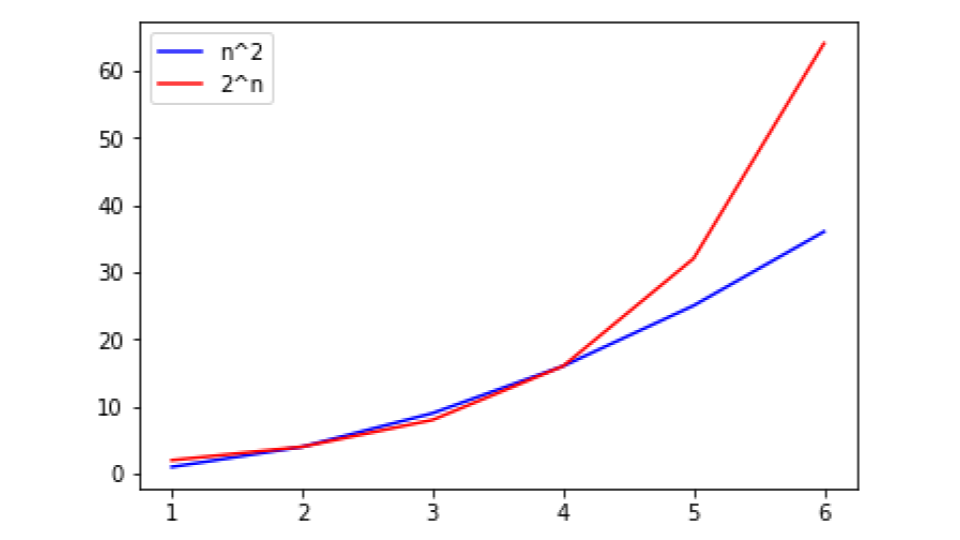

The code used to generate the above visual is below. Try changing the value of `N` to 3 or 4, then to 9 or 10. This should demonstrate that visualization is not always a reliable tool for deciding which of two functions grows faster.

In [ ]:
import matplotlib.pyplot as plt

N = 6
n = [i for i in range(1, N + 1)]

n_squared = [i**2 for i in n]
two_to_the_n = [2**i for i in n]

plt.plot(n, n_squared, color='blue', label='n^2')
plt.plot(n, two_to_the_n, color='red', label='2^n')
plt.legend()
plt.show()

To visualize growth at very large values of $n$, it is often useful to use a log scale.

In [ ]:
import matplotlib.pyplot as plt

N = 100
n = [i for i in range(1, N+1)]

n_squared = [i**2 for i in n]
two_to_the_n = [2**i for i in n]

plt.plot(n, n_squared, color='blue', label='n^2')
plt.plot(n, two_to_the_n, color='red', label='2^n')
plt.yscale('log') # this makes the y-axis a log scale
plt.legend()
plt.show()

### Properties of big-O

Instead of *proving* that a function is big-O of another function, we usually rely on a few key properties of big-O.

1. *Additive constants can be ignored.* For example, $n^2 + 1000 = O(n^2)$.

   Formally: $f(n) + K = O(f(n))$ for any constant $K$.

1. *Multiplicative constants can be ignored.* For example, $1000n^2 = O(n^2)$.

   Formally: $Kf(n) = O(f(n))$ for any positive constant $K$.

1. *The sum of multiple expressions only grows as fast as the fastest growing expression.* For example, $n^2 + 2^n = O(2^n)$ since $2^n$ grows faster than $n^2$.

   Formally: If $f_1(n) = O(g_1(n))$ and $f_2(n) = O(g_2(n))$, then $f_1(n) + f_2(n) = O(\max(g_1(n), g_2(n)))$.

1. *The big-O growth of a product of expressions is the same as the product of the big-O growth of each individual expression.* For example, For example, if an unknown function $f(n)$ is known to be $O(n^2)$ and an unknown function $g(n)$ is known to be $O(g(n)$, then even without knowing $f(n)$ and $g(n)$, we know that $f(n)g(n) = O(n^2 2^n)$.

   Formally: If $f_1(n) = O(g_1(n))$ and $f_2(n) = O(g_2(n))$, then $f_1(n)f_2(n) = O(g_1(n)g_2(n))$.

### Using big-O for complexity analysis

When analyzing complexity, we rarely care about the *exact* complexity of an algorithm. Instead, we care about how the algorithm complexity changes as the size of the input(s) changes. This is where we use big-O notation to simplify how we measure complexity.

Consider the time complexity of the `print_up_to` function, which is $3n+2$. The additive and multiplicative constants can be ignored, so $O(3n+2) = O(n)$. This means that the time complexity grows approximately proportionally to the size of the input $n$. For example, if $n$ is multiplied by 10, then the time complexity of `print_up_to` is approximately multiplied by 10, for large $n$.

As for the space complexity of `print_up_to` which is just 1, this can't be simplified any further, so it is just $O(1)$.

Consider an algorithm with a time complexity of $2^n + n^2$. As seen earlier, $O(2^n + n^2) = O(2^n)$, so the big-O time complexity of this algorithm is just $O(2^n)$. The reason we usually only care about the big-O complexity of an algorithm is that it tells us the most significant contribution to the complexity as $n$ gets very large.

### Analyzing complexity line-by-line

Let's have a look at the big-O complexity of `print_up_to` line by line. If a function can be split up into separate interior functions, then the big-O complexity of the function is the maximum of the big-O complexities of the interior functions. For this code, we can split up the function line by line and find the big-O complexity of each line  independently to find the big-O complexity of the function.

In [ ]:
def print_up_to(n):
  """Prints the non-negative integers up to n."""
  i = 0 # time: O(1), space: O(1)
  while i < n: # n iterations, space: 0
    print(i) # time: O(1), space: 0
    i += 1 # time: O(n), space: 0

We can calculate the big-O time complexity of the function line-by-line as

\begin{align*}
O(1)+n(O(1)+O(1)) &= O(1) + O(n) \\
&= O(n). \\
\end{align*}

The big-O space complexity is simply $O(1)$, since none of the operations within the `while` loop require any space.

In this era of computer science, space is plentiful. (This wasn't always the case!) Consequently, the analysis of the time complexity of algorithms is more common than the analysis of space complexity. However, it is always important to be conscious of space allocation in any algorithm.

### Common complexities

The more algorithms you see and use, the more important it is to have a quick and simple way to classify efficiency. Below is a table with the most common complexities by name and big-O complexity, in order of increasing complexity. (For example, *quadratic* is a higher complexity than *linear*.)

| Big-O Complexity | Complexity Name |
|:----------------:|:---------------:|
| $O(1)$           | constant        |
| $O(\log_2(n))$   | log             |
| $O(\sqrt n)$     | square root     |
| $O(n)$           | linear          |
| $O(n \log_2(n))$ | linearithmic    |
| $O(n^2)$         | quadratic       |
| $O(2^n)$         | exponential     |
| $O(n!)$          | factorial       |

In general, any function of $n$ can be within the big-O expression. The above classes are just the most common complexities. See [here](https://en.wikipedia.org/wiki/Time_complexity#Table_of_common_time_complexities) for a longer and more exhaustive list of complexity classes.

### Classifying the complexity class of a function

The `print_up_to` function has a *linear* time complexity. If instead, it printed all possible *pairs* of integers (see the function below), the time complexity would be *quadratic*.

The time complexity of `print_pairs_up_to` is $O(n^2)$ since both the outer and inner `for` loops are $O(n)$, so the product of them is $O(n^2)$. Another way to think of this is that there are $n^2$ possible combinations of pairs of non-negative integers less than $n$.

In [ ]:
def print_pairs_up_to(n):
  """Prints all possible pairs of non-negative integers up to n."""
  for i in range(n): # n iterations, space: O(1)
    for j in range(n): # n iterations, space: O(1)
      print(i, j) # time: O(1), space: 0

In [ ]:
print_pairs_up_to(5)

## Question 1

Which of the following statements about time complexity are correct? There may be more than one correct response. 

**a)** Time complexity describes the amount of time a program takes to run.

**b)** Two algorithms with the same time complexity always take the same time to run.

**c)** If a `for` loop has $n$ iterations, its time complexity is always $O(n)$.

**d)** The time complexity of any arithmetic calculation (e.g. anything you can calculate using a pocket calculator) is $O(1)$.

**e)** If two different algorithms do the same thing (e.g. sorting an array of integers), they always have the same time complexity.


### Solution

The correct answers are **a)** and **d)**. 

**b)** While time complexity describes runtime, external factors like different computers also affect runtime.

**c)** This is true only if the code within each iteration is $O(1)$. For example, if the code within each iteration is $O(n)$, then the `for` loop has a total time complexity of $O(n^2)$.

**e)** There are many algorithms for sorting an array of integers, with very different time complexities.

## Question 2

Which of the following statements about space complexity are correct? There may be more than one correct response. 

**a)** Space complexity describes how much space a program file takes up on a computer.

**b)** Space complexity describes the amount of storage required for a program to run.

**c)** If two different algorithms do the same thing, then the one with quicker time complexity must have greater space complexity.

**d)** Assigning a variable always has a space complexity of $O(1)$.

**e)** Creating an instance of a class is always $O(1)$.


### Solution

The correct answers are **b)** and **e)**. 

**a)** Space complexity does not describe the size of the program itself, but the amount of space it requires to run.

**c)**  While it is often the case that time and space complexity go in opposite directions, it is not always true.

**d)** Assigning a variable to something whose size can change is not necessarily $O(1)$. For example, consider a function `f(n)` that creates an array of size `n`, e.g. `arr = [i for i in range(n)]`; this variable assignment is $O(n)$.


## Question 3

Which of the following statements about big-O are true?

**a)** Big-O notation is used to measure how quickly time and space complexity of a program grow as the program inputs grow.

**b)** Big-O notation describes how fast a function grows as the input grows towards infinity.

**c)** If a function `mysort` is $O(n\log(n))$ and a function `yoursort` is $O(n^2)$ where $n$ is the size of the input array being sorted, then `mysort` has a lower time complexity than `yoursort`.

**d)** A space complexity of $O(1)$ means no space is used.

**e)** The expression $3\sqrt{n} + 2n^2 + 3^n$ is $O(n^2)$.


### Solution

The correct answers are **a)**, **b)**, and **c)**. 

**d)** $O(1)$ means constant, it does mean zero. A space complexity of $O(1)$ means that the amount of space required does not depend on any inputs; this does not mean that the required space is zero.

**e)** The fastest growing additive term in this expression is $3^n$, so the expression is $O(3^n)$.

## Question 4

Rank the following big-O expressions of *n* from slowest growing to fastest growing.

- $O(n^2)$
- $O(n!)$
- $O(n)$
- $O(\log(n))$
- $O(n\log(n))$
- $O(1)$
- $O(\sqrt{n})$
$ O(2^n)$

In [ ]:
#freetext

### Solution

The following are ranked from slowest growing to fastest growing.

1. $O(1)$
1. $O(\log(n))$
1. $O(\sqrt{n})$
1. $O(n)$
1. $O(n\log(n))$
1. $O(n^2)$
1. $O(2^n)$
1. $O(n!)$

## Question 5

What is the big-O time complexity of a function that finds the minimum value in an array of integers?

In [ ]:
def minimum(arr):
  """Finds the minimum of a list of integers."""
  min_value = float("Inf")

  for i in arr:
    if i < min_value:
      min_value = i
  
  return min_value

In [ ]:
#freetext

### Solution

All of the single operations in this function are $O(1)$ for time. The `for` loop has $n$ iterations (where $n$ is the length of `arr`), so the operations within the `for` loop are repated $n$ times.

In [ ]:
def minimum(arr):
  """Finds the minimum of a list of integers."""
  min_value = float("Inf") # time: O(1), space: O(1)

  for i in arr: # n iterations, space: O(1)
    if i < min_value: # time: O(1), space: 0
      min_value = i # time: O(1), space: 0
  
  return min_value # time: O(1)

Using the line-by-line operations above and the properties from the Lesson Overview, the total time complexity is

\begin{align*}
O(1) + n(O(1) + O(1)) + O(1) &= O(1) + O(n) + O(1) \\
&= O(n). \\
\end{align*}

## Question 6

What is the time and space complexity of finding the minimum value of an array that is already pre-sorted?

In [ ]:
#freetext

### Solution

If the array is pre-sorted, then all the function needs to do is return the first element of the array, or the last if it is sorted in descending order. This is a single operation that does not depend on the length of the array, so the function is $O(1)$ for both time and space.

## Question 7

One of the most classic algorithm problems in computer science is sorting an array of integers. There are several commonly used sorting algorithms, varying in code complexity, time complexity, and space complexity.

Here are just a few:

- *Selection sort* repeatedly moves the minimum of the array to a sorted output array. The time complexity is $O(n^2)$.

- *Bogosort* creates every possible permutation of the array and chooses the sorted one. The time complexity is $O(n \cdot n!)$.

- *Merge sort* divides the array into single elements and repeatedly merges the arrays to maintain ordering. The time complexity is $O(n\log(n))$.

Which of these algorithms has the best time complexity? What about the worst?

In [ ]:
#freetext

### Solution

Using the table in the Lesson Overview, $n\log(n)$ grows faster than $n^2$ which grows faster than $n!$. (And $n \cdot n! \geq n!$, this means $n^2$ grows faster than $n \cdot n!$.) Therefore, merge sort is more efficient than selection sort which is more efficient than bogosort.

Without using the table, we can also demonstrate these comparisons. Let's start by comparing bogosort to selection sort.

\begin{align*}
n \cdot n! &= n \cdot n \times (n-1) \times (n-2) \times ... \times 1 \\
&= n^2 \cdot (n-1)! \\
&> n^2 \\
\end{align*}

since for large $n$, $(n-1)!$ is larger than 1. Therefore, $n \cdot n! > n^2$ for large $n$ so bogosort is higher complexity than selection sort.

Now, let's compare selection sort and merge sort. $\log(n) < n$ for any $n$. Therefore, $n^2 > n\log(n)$, and selection sort is higher complexity than merge sort.

## Question 8

Complexity is not necessarily a function of only one variable, *n*. If a function has 2 inputs, *n* and *m*, then the time and space complexity are expressions of *n* and *m* as well. This can be extended to any arbitrary number of variables.

What is the time and space complexity of the following function, in terms of $n$ and $m$?

In [ ]:
def all_pairs_up_to(n, m):
  """Prints all ordered combinations of two integers less than n and m."""
  for i in range(n):
    for j in range(m):
      print(i, j)

all_pairs_up_to(2, 3)

In [ ]:
#freetext

### Solution

The time complexity of this function is the number of iterations it has to execute. The outer loop contains $n$ iterations, and each of these contains $m$ iterations. Therefore, the big-O time complexity is $O(nm)$.

The space complexity is just $O(1)$, since the variable storage does not depend on $n$ or $m$. The only variables that require storage are the temporary variables $i$ and $j$.

## Question 9

The function below recursively calculates the `n`th Fibonacci number.

In [ ]:
def fibonacci_recursive(n):
  # Raise an error if n is not a non-negative integer. The Fibonacci sequence is
  # not defined for such cases.
  if not isinstance(n, int) or n < 0:
    raise ValueError("input must be a non-negative integer")

  # This defines the base case.
  if n == 0 or n == 1:
    return n

  # This defines the recursive formula. Note that it references the function
  # itself, fibonacci_recursive.
  return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

What is the big-O time complexity of `print_first_32_fibonacci_numbers` below?

In [ ]:
def print_first_32_fibonacci_numbers():
  for n in range(32):
    print(fibonacci_recursive(n))

In [ ]:
# This code cell may take a few seconds to run.
print_first_32_fibonacci_numbers()

In [ ]:
#freetext

### Solution

Even though `fibonacci_recursive` has a big-O time complexity of $O(2^n)$, `print_first_32_fibonacci_numbers` is actually $O(1)$. The reason is that `print_first_32_fibonacci_numbers` does not have any inputs, so every time you run it, the runtime does not change. Even if the amount of time required for each calculation is high, as long as the *number* of calculations is constant, the function is $O(1)$.

In general, an algorithm being $O(1)$ does not necessarily mean that it executes quickly. It means that the execution time does not vary as the input changes. Since `print_first_32_fibonacci_numbers` does not have any inputs, it is automatically $O(1)$.

## Question 10

What is the big-O time and space complexity of multiplying an *n* x *m* matrix by an *m* x *p* matrix? See [here](https://en.wikipedia.org/wiki/Matrix_multiplication) for a refresher on matrix multiplication.

In [ ]:
#freetext

### Solution

Let's call the $n \times m$ matrix $A$, and the $m \times p$ matrix $B$. Let $C = AB$. $C$ is an $n \times p$ matrix, so the number of numbers to store is $np$, and the space complexity is $O(np)$.

The element in the first row and first column of $C$ is the [dot product](https://en.wikipedia.org/wiki/Dot_product) of the first row of $A$ ($m$ elements) and the first column of $B$ ($m$ elements). Calculating this dot product requires $m$ multiplications and $m-1$ additions, for a total of $2m-1$ operations. This needs to be done for each of the $np$ elements in $C$. Therefore the number of operations in the matrix multiplication is $2(m-1)np$, so the time complexity is $O(mnp)$.

## Question 11

[Advanced] Using a visualization, relate the following two functions using big-O notation.

\begin{align*}
f(n) &= n\log_2(n) \\
g(n) &= n^{1.25} \\
\end{align*}

In [ ]:
import matplotlib.pyplot as plt

n = [] # input some values of n

f = [] # create a list of values for f(n)
g = [] # create a list of values for g(n)

plt.plot(n, f, color='blue', label='nlog_2(n)')
plt.plot(n, g, color='red', label='n^1.25')
# You might find it useful to use a log scale.
plt.yscale('log')
plt.legend()
plt.show()

### Hint

Use the code in the Lesson Overview to create graphs. You can use the `numpy` package to calculate logs. The default `np.log` is the natural log, so you should use `np.log2`, as below.

In [ ]:
import numpy as np

print(np.log2(4))

### Solution

Be very careful with this one. These two functions grow very similarly initially, but for large $n$ you should see that $n^{1.25}$ grows faster than $n\log_2(n)$. You may find it useful to create the plot for a specific range of large $n$, such as from `1e6` to `2e6` as below.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = [i for i in range(1, int(1e6))]

f = [i*np.log2(i) for i in n]
g = [i**1.25 for i in n]

plt.plot(n, f, color='blue', label='nlog_2(n)')
plt.plot(n, g, color='red', label='n^1.25')
plt.yscale('log')
plt.legend()
plt.show()

From this, we can see that $n\log_2(n) = O(n^{1.25})$.

## Question 12

[Advanced] The function below recursively calculates the *n*th Fibonacci number.

In [ ]:
def fibonacci_recursive(n):
  # Raise an error if n is not a non-negative integer. The Fibonacci sequence is
  # not defined for such cases.
  if not isinstance(n, int) or n < 0:
    raise ValueError("input must be a non-negative integer")

  # This defines the base case.
  if n == 0 or n == 1:
    return n

  # This defines the recursive formula. Note that it references the function
  # itself, fibonacci_recursive.
  return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

Show that the big-O time complexity of this algorithm is $O(2^n)$.

In [ ]:
#freetext

### Solution

There are a few ways to do this. One way would be by inspection of the [recursion tree](https://math.stackexchange.com/questions/178375/what-will-the-recursion-tree-of-fibonacci-series-look-like). Another way is to use [mathematical induction](https://en.wikipedia.org/wiki/Mathematical_induction).

Let the big-O time complexity of the function be $T(n)$. We need to show that $T(n) = O(2^n)$. The first step of an inductive proof is to show that the statement is true for $n = 0$. $T(0)$ is the big-O time complexity of `fibonacci_recursive(0)`. In this case, the function returns 0 in the `if n == 0` clause. No operations are performed more than once, so the big-O complexity is $O(1)$. Therefore $T(0) = O(2^0)$.

The next step of an inductive proof is to show that if $T(m) = O(2^m)$ for $m < n$ then $T(n) = O(2^n)$. Based on the final line of the function, the complexity of `fibonacci_recursive(n)` is the sum of the complexities  of `fibonacci_recursive(n-1)` and `fibonacci_recursive(n-2)` plus $O(1)$.

\begin{align*}
T(n) &= T(n-1) + T(n-2) + O(1) \\
&= O(2^{n-1}) + O(2^{n-2}) + O(1) \\
&= O \left( \frac{1}{2} 2^n \right) + O \left( \frac{1}{4} 2^n \right) + O(1) \\
&= O(2^n) + O(2^n) + O(1) \\
&= O(2^n) \\
\end{align*}

An alternative but similar way to approach this is as follows:

\begin{align*}
T(n) &= T(n-1) + T(n-2) + O(1) \\
&\leq T(n-1) + T(n-1) + O(1) \\
&= 2T(n-1) + O(1) \\
&\leq 2(T(n-2) + T(n-2) + O(1)) + O(1) \\
&= 2^2 T(n-2) + O(1) \\
&... \\
&\leq 2^i T(n-i) + O(1) \\
&\leq 2^n T(0) + O(1) \\
&= 2^nO(1) + O(1) \\
&= O(2^n) \\
\end{align*}